# Properties of Gravitational Solitons by Boyd, Centrella & Klasky
##  Geoff Cope
##  Univeristy of Utah
##  December 26, 2021

Here we derive the vacuum field equations for metric 3.16

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.43.379

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols( 't x y z dt dx dy dz' ) 

In [4]:
gamma = Function('gamma')(z,t)
gamma

In [5]:
psi = Function('psi')(z,t)
psi

In [6]:
variables = Matrix( [t,x,y,z] )
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dt,dx,dy,dz] )
differentials

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [8]:
lineElement = expand(exp(gamma-psi) * (dz**2 - dt**2) + exp(psi) * dx**2 + t**2 * exp(-psi) * dy**2)
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  γ(z, t)  -ψ(z, t)                                            ⎤
⎢-ℯ       ⋅ℯ             0           0                0         ⎥
⎢                                                               ⎥
⎢                      ψ(z, t)                                  ⎥
⎢         0           ℯ              0                0         ⎥
⎢                                                               ⎥
⎢                                2  -ψ(z, t)                    ⎥
⎢         0              0      t ⋅ℯ                  0         ⎥
⎢                                                               ⎥
⎢                                              γ(z, t)  -ψ(z, t)⎥
⎣         0              0           0        ℯ       ⋅ℯ        ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  γ(z, t)  -ψ(z, t)                                            ⎤
⎢-ℯ       ⋅ℯ             0           0                0         ⎥
⎢                                                               ⎥
⎢                      ψ(z, t)                                  ⎥
⎢         0           ℯ              0                0         ⎥
⎢                                                               ⎥
⎢                                2  -ψ(z, t)                    ⎥
⎢         0              0      t ⋅ℯ                  0         ⎥
⎢                                                               ⎥
⎢                                              γ(z, t)  -ψ(z, t)⎥
⎣         0              0           0        ℯ       ⋅ℯ        ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂                                                                                  ∂             ∂          ⎤            
⎢⎢──(γ(z, t))   ──(ψ(z, t))                                                                        ──(γ(z, t))   ──(ψ(z, t))⎥            
⎢⎢∂t            ∂t                                                                                 ∂z            ∂z         ⎥  ⎡         
⎢⎢─────────── - ───────────                  0                                  0                  ─────────── - ───────────⎥  ⎢         
⎢⎢     2             2                                                                                  2             2     ⎥  ⎢         
⎢⎢                                                                                                                          ⎥  ⎢     0   
⎢⎢                            -γ(z, t) + 2⋅ψ(z, t) ∂                                                                        ⎥  ⎢         
⎢⎢                           ℯ    

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2              2                         2     2              2         ⎞                                                        
⎢  ⎜   ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                                      
⎢t⋅⎜- ───(γ(z, t)) + ───(γ(z, t)) - ⎜──(ψ(z, t))⎟  + ───(ψ(z, t)) - ───(ψ(z, t))⎟ + ──(γ(z, t)) + ──(ψ(z, t))                            
⎢  ⎜    2              2            ⎝∂t         ⎠      2              2         ⎟   ∂t            ∂t                                     
⎢  ⎝  ∂t             ∂z                              ∂t             ∂z          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                    2⋅t                                                                                 
⎢                                 

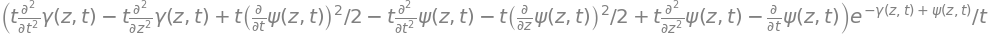

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                                                   ⎛                    
⎢                                                                                                                   ⎜                    
⎢  ⎛    2              2                         2     2              2         ⎞                                   ⎜    2               
⎢  ⎜   ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                 ⎜   ∂                
⎢t⋅⎜- ───(γ(z, t)) + ───(γ(z, t)) - ⎜──(ψ(z, t))⎟  + ───(ψ(z, t)) - ───(ψ(z, t))⎟ + ──(γ(z, t)) + ──(ψ(z, t))   0.5⋅⎜t⋅───(γ(z, t)) - t⋅─
⎢  ⎜    2              2            ⎝∂t         ⎠      2              2         ⎟   ∂t            ∂t                ⎜    2               
⎢  ⎝  ∂t             ∂z                              ∂t             ∂z          ⎠                                   ⎝  ∂t               ∂
⎢─────────────────────────────────

In [19]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
simplify(Ric.tensor())

⎡    ⎛  2              2                         2     2              2         ⎞                                                        
⎢    ⎜ ∂              ∂             ⎛∂          ⎞     ∂              ∂          ⎟   ∂             ∂                                      
⎢- t⋅⎜───(γ(z, t)) - ───(γ(z, t)) + ⎜──(ψ(z, t))⎟  - ───(ψ(z, t)) + ───(ψ(z, t))⎟ + ──(γ(z, t)) + ──(ψ(z, t))                            
⎢    ⎜  2              2            ⎝∂t         ⎠      2              2         ⎟   ∂t            ∂t                                     
⎢    ⎝∂t             ∂z                              ∂t             ∂z          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                    2⋅t                                                                                 
⎢                                 

In [22]:
simplify(einst.tensor())

⎡                                                  ∂                                                                                     
⎢                    2                     2   0.5⋅──(γ(z, t))                                                                           
⎢       ⎛∂          ⎞         ⎛∂          ⎞        ∂t                                                                                    
⎢- 0.25⋅⎜──(ψ(z, t))⎟  - 0.25⋅⎜──(ψ(z, t))⎟  + ───────────────                                                                           
⎢       ⎝∂t         ⎠         ⎝∂z         ⎠           t                                                                                  
⎢                                                                                                                                        
⎢                                                               ⎛          2                    2                                2       
⎢                                 

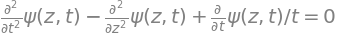

In [23]:
equation3pt17 = Eq(expand((1/t)*Ric.tensor()[1,1].args[2]),0)
equation3pt17

In [24]:
equation3pt18 = Eq(diff(gamma,t),solve( simplify(einst.tensor())[0,0], diff(gamma,t))[0])
equation3pt18

In [25]:
equation3pt19 = Eq(diff(gamma,z),solve( simplify(einst.tensor())[3,0] , diff(gamma,z) )[0] )
equation3pt19

In [27]:
vacuumFieldEquations = Matrix([equation3pt17,equation3pt18,equation3pt19])
vacuumFieldEquations 

⎡                                  ∂                  ⎤
⎢      2              2            ──(ψ(z, t))        ⎥
⎢     ∂              ∂             ∂t                 ⎥
⎢    ───(ψ(z, t)) - ───(ψ(z, t)) + ─────────── = 0    ⎥
⎢      2              2                 t             ⎥
⎢    ∂t             ∂z                                ⎥
⎢                                                     ⎥
⎢                    ⎛             2                2⎞⎥
⎢∂                   ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(z, t)) = 0.5⋅t⋅⎜⎜──(ψ(z, t))⎟  + ⎜──(ψ(z, t))⎟ ⎟⎥
⎢∂t                  ⎝⎝∂t         ⎠    ⎝∂z         ⎠ ⎠⎥
⎢                                                     ⎥
⎢       ∂               ∂           ∂                 ⎥
⎢       ──(γ(z, t)) = t⋅──(ψ(z, t))⋅──(ψ(z, t))       ⎥
⎣       ∂z              ∂t          ∂z                ⎦

In [28]:
X, Y = map(Function, 'XY')

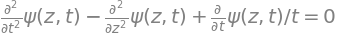

In [29]:
eq = vacuumFieldEquations[0]
eq

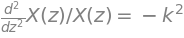

In [36]:
xODE = Eq(pde_separate( eq, psi, [X(z),Y(t)])[0] , -k**2 ) 
xODE

In [38]:
xSolution = dsolve( xODE , X(z))
xSolution 

In [39]:
#  Here we arbitrarily set the cos function equal to zero.  Change this later 
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],0)
xSolutionParticular

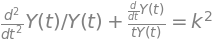

In [41]:
yODE = Eq( pde_separate( eq, psi, [X(z),Y(t)])[1] ,  k**2 ) 
yODE

In [43]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [45]:
#  Here we are arbitrarily setting one of the bessel functions equal to zero.  go back and fix this
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],0).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

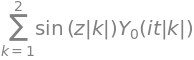

In [46]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [47]:
psiSumTwoTerms = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [48]:
dgammadtPDE = vacuumFieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadtPDE

In [49]:
dgammadtPDE.doit()

In [50]:
expand(dgammadtPDE.doit())

In [51]:
integrateGammaWRTt = pdsolve( expand(dgammadtPDE.doit()) )
integrateGammaWRTt

In [52]:
dgammadzPDE = vacuumFieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadzPDE

In [53]:
dgammadzPDE.doit()

In [54]:
expand(dgammadzPDE.doit())

In [55]:
integrategammaWRTz = pdsolve(expand(dgammadzPDE.doit()) )
integrategammaWRTz